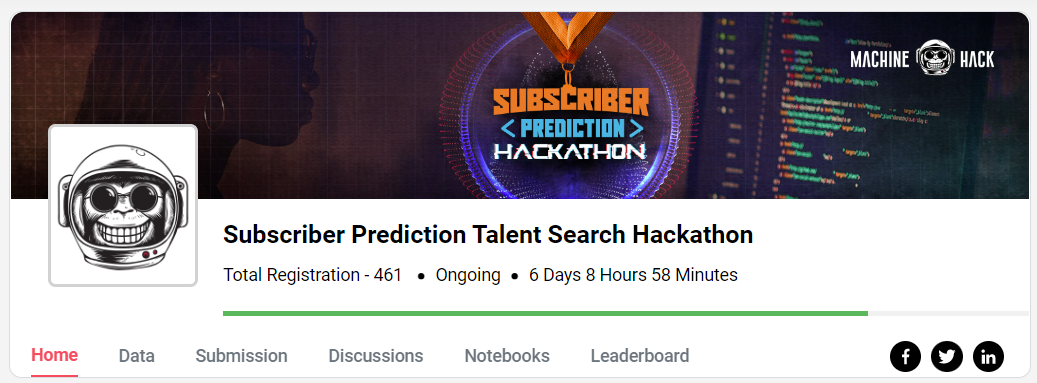

(Data dimension: 17 features and 30,000 records)

The dataset has 17 features, including 16 input features and 1 output or target feature

# Input Features

1. Age: Age of the customer
2. Job: Type of job of customer
3. Marital: Marital status of the customer
4. Education: The education level of the customer
5. Default: Has credit in default?
6. Balance: Average yearly balance (in Euros)
7. Housing: Has a housing loan?
8. Loan: Has a personal loan?
9. Contact: Contact communication type
10. Day: Last contact day of the month
11. Month: Last contact month of the year
12. Duration: Last contact duration, in seconds
13. Campaign: Number of contacts performed during this campaign and for this client
14. Pdays: Number of days that passed by after the client was last contacted from a previous campaign (-1 means the client was not previously contacted)
15. Previous: Number of contacts performed before this campaign and for this client
16. Poutcome: Outcome of the previous marketing campaign

# Output feature (Target feature)

 17 - y - Has the customer subscribed to a term deposit?

The hackathon participants need to build a machine learning based model to predict the value of the target feature (whether a customer will subscribe to the plan or not) based on the given set of input features.

# Problem Statement

This hackathon will try to address the challenges of banking telecallers when they call blindly to people in order to sell term deposit plans. The aim of this hackathon is to find the most accurate prediction of whether a person to be called will subscribe to the term deposit plan or not using any of the machine learning algorithms. The participants can use the historical data that consists of different features of customers and whether they subscribed to the plan or not. Using this data, the participants need to build a machine learning model in order to make predictions.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15,10]

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0


In [4]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,36,technician,divorced,secondary,no,1842,yes,yes,cellular,5,aug,149,1,-1,0,unknown
1,26,management,married,primary,no,165,no,no,cellular,7,nov,44,2,-1,0,unknown
2,50,management,married,unknown,no,5006,yes,no,cellular,7,may,664,2,-1,0,other
3,56,management,married,secondary,no,5122,no,no,cellular,9,aug,53,2,-1,0,unknown
4,26,blue-collar,married,tertiary,no,151,no,no,unknown,1,jul,67,5,130,0,unknown


In [5]:
train.shape, test.shape

((21000, 17), (9000, 16))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        21000 non-null  int64 
 1   job        21000 non-null  object
 2   marital    21000 non-null  object
 3   education  21000 non-null  object
 4   default    21000 non-null  object
 5   balance    21000 non-null  int64 
 6   housing    21000 non-null  object
 7   loan       21000 non-null  object
 8   contact    21000 non-null  object
 9   day        21000 non-null  int64 
 10  month      21000 non-null  object
 11  duration   21000 non-null  int64 
 12  campaign   21000 non-null  int64 
 13  pdays      21000 non-null  int64 
 14  previous   21000 non-null  int64 
 15  poutcome   21000 non-null  object
 16  y_bool     21000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 2.7+ MB


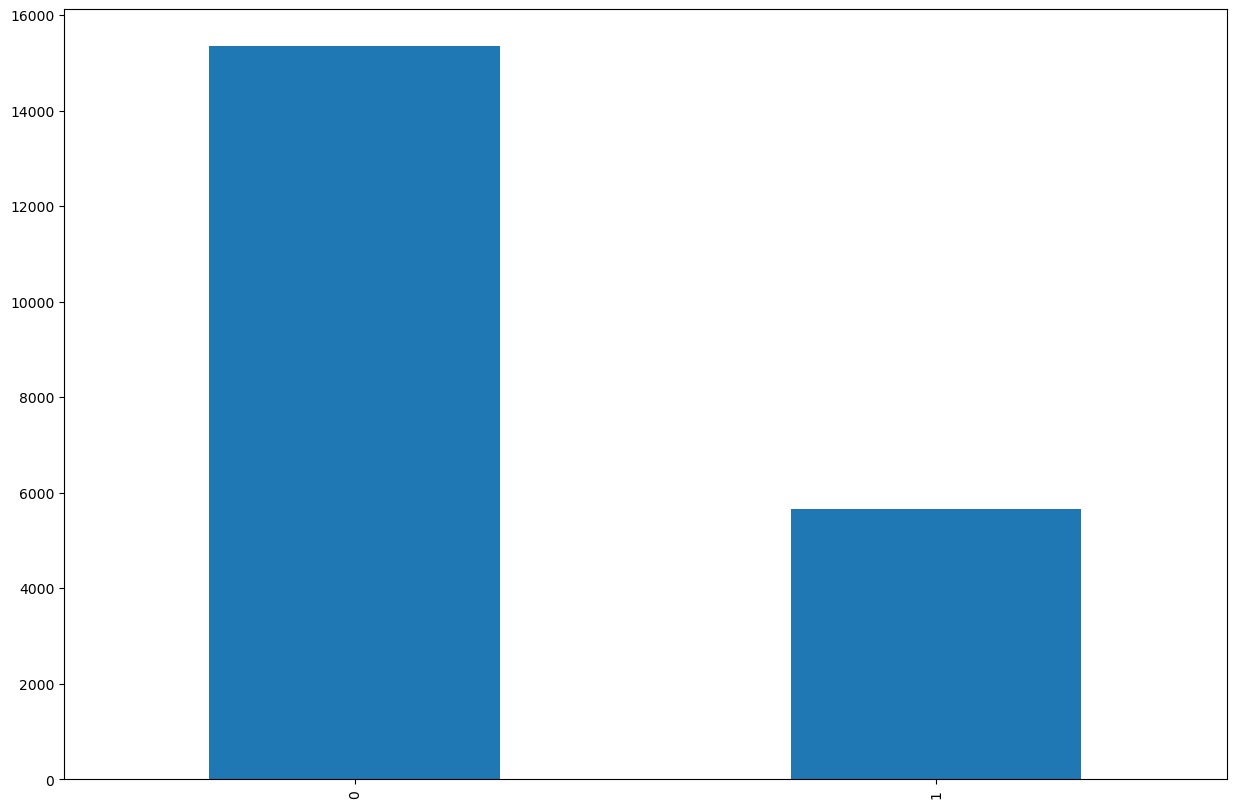

In [7]:
train.y_bool.value_counts().plot(kind='bar')
plt.show()

In [8]:
combined = pd.concat([train,test], ignore_index=True)

In [9]:
combined.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y_bool'],
      dtype='object')

In [10]:
combined.job.unique()

array(['admin.', 'blue-collar', 'services', 'self-employed', 'technician',
       'management', 'unknown', 'unemployed', 'retired', 'housemaid',
       'entrepreneur', 'student'], dtype=object)

In [11]:
#Lets bin the Proffession...

def prof(x):
    if x in ['unknown','unemployed','retired','student']:
        return("Unemployed")
    elif x in ['admin.', 'housemaid','entrepreneur','self-employed', 'management']:
        return("Employed")
    elif x in ['blue-collar','services','technician']:
        return('Blue_colar')
    else:
        return(x)

In [12]:
combined['profession'] = combined.job.apply(prof)

In [13]:
combined.profession.unique()

array(['Employed', 'Blue_colar', 'Unemployed'], dtype=object)

In [14]:
import scipy.stats as stats

In [15]:
tbl = pd.crosstab(combined.profession, combined.y_bool)

teststats, pvalue, df, exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

0.7251909293939804


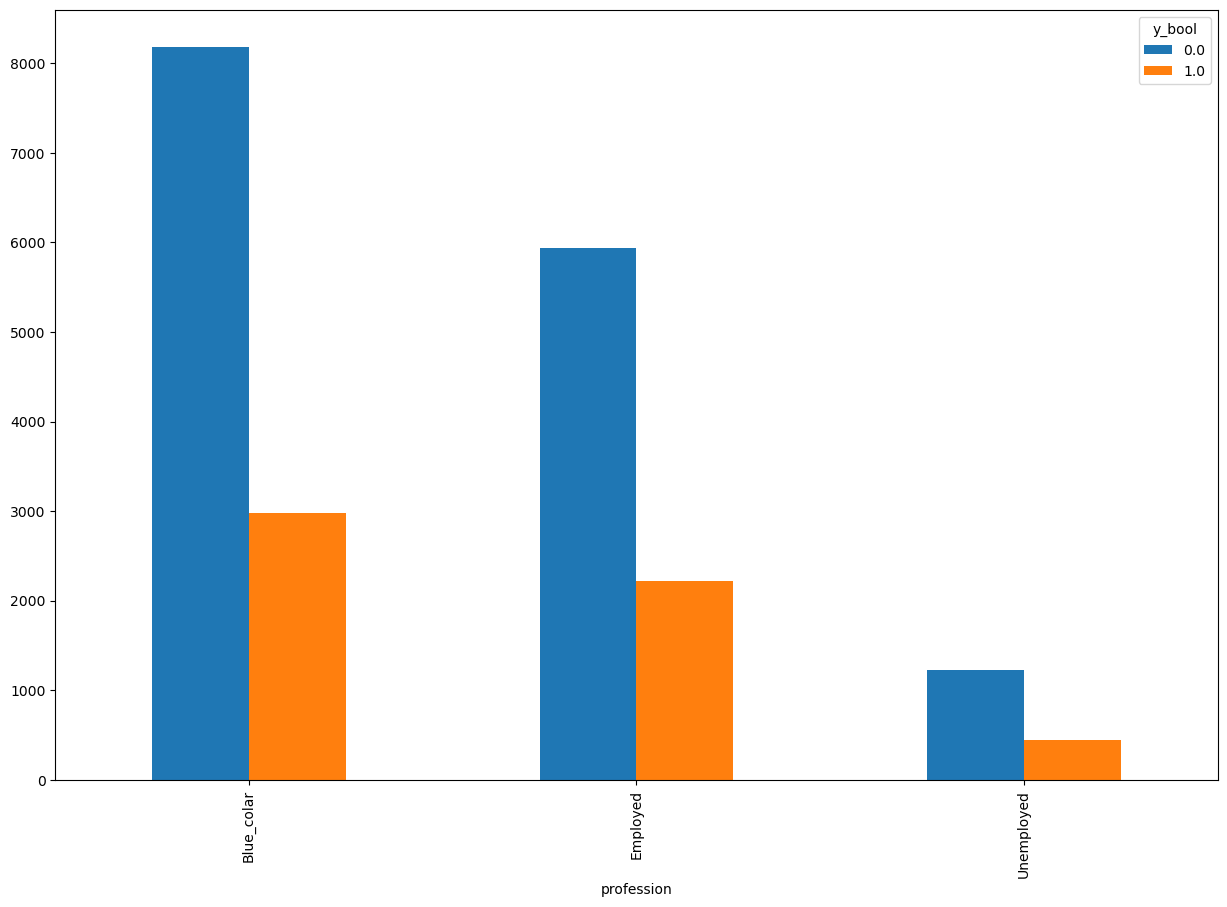

In [16]:
tbl.plot(kind='bar')
plt.show()

In [17]:
cat_cols = combined.select_dtypes(include="object").columns

In [18]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'profession'],
      dtype='object')

In [19]:
for i in cat_cols:
    if len(combined.loc[:,i].unique())<=3:
        print(i)

marital
default
housing
loan
contact
profession


In [20]:
combined.education.unique()

array(['tertiary', 'secondary', 'primary', 'unknown'], dtype=object)

In [21]:
combined.loc[combined.education=="unknown","profession"].value_counts()

Blue_colar    846
Employed      643
Unemployed    126
Name: profession, dtype: int64

In [22]:
combined.groupby("education")["profession"].value_counts()

education  profession
primary    Blue_colar    1723
           Employed      1196
           Unemployed     254
secondary  Blue_colar    8103
           Employed      5909
           Unemployed    1192
tertiary   Blue_colar    5254
           Employed      3932
           Unemployed     822
unknown    Blue_colar     846
           Employed       643
           Unemployed     126
Name: profession, dtype: int64

In [23]:
# No Employed ~ Blue Collar and rest ~ Some Education

In [24]:
combined.default.unique()

array(['no', 'yes'], dtype=object)

In [25]:
combined.contact.unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [26]:
pd.DataFrame(combined.groupby("poutcome")["y_bool"].value_counts(normalize = True)).T

poutcome   failure               other             success            \
y_bool         0.0       1.0       0.0       1.0       0.0       1.0   
y_bool    0.742012  0.257988  0.732836  0.267164  0.689922  0.310078   

poutcome   unknown            
y_bool         0.0       1.0  
y_bool    0.729178  0.270822

# Chi Square Test

In [27]:
# Apply Chi Square Test to verify the Important Cat Variables.

In [28]:
feats = []

for i in cat_cols:
    tbl = pd.crosstab(combined.loc[:,i], combined.y_bool)
    teststats, pvalue, df, exp_freq = stats.chi2_contingency(tbl)
    if pvalue< 0.05:
        feats.append(i)
print(feats)

['job']


In [29]:
# List of num vars...
num_cols = combined.select_dtypes(include= np.number).columns

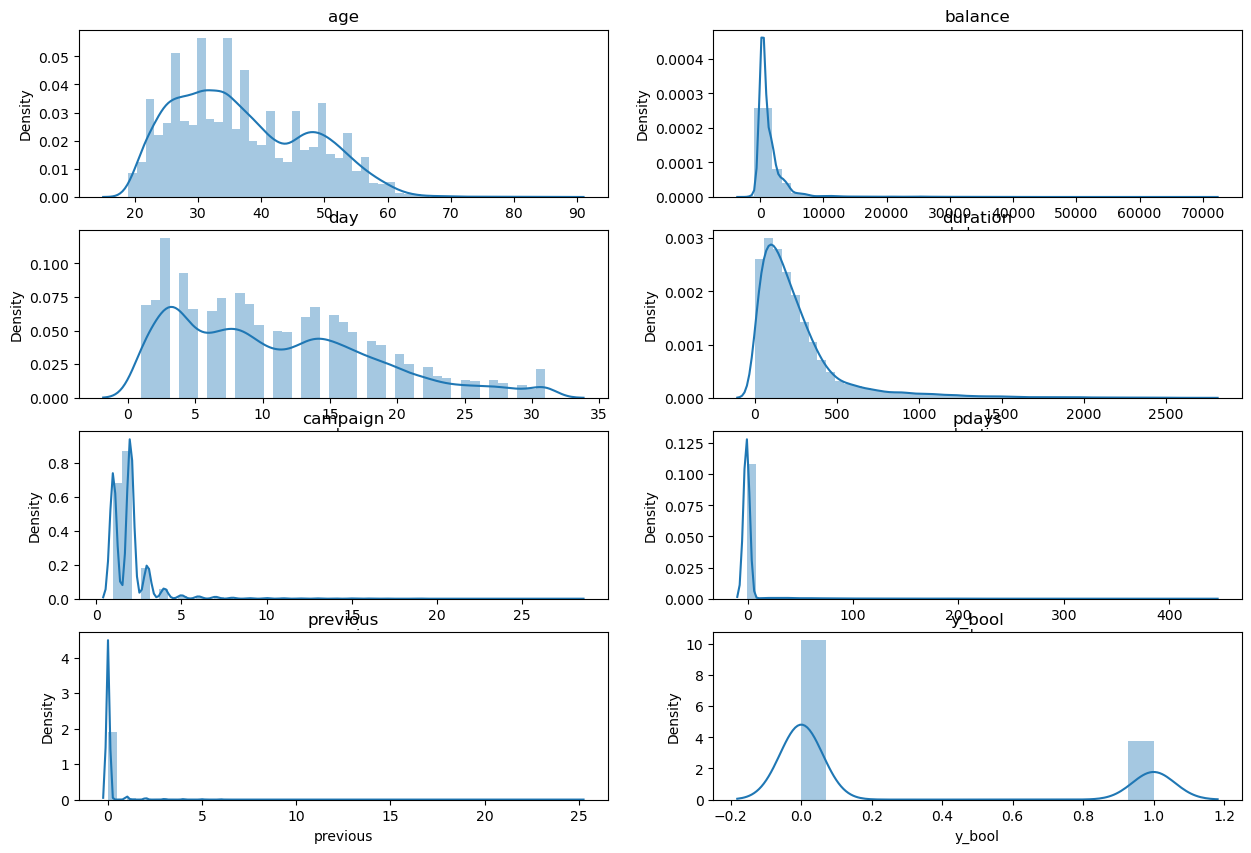

In [30]:
nrows = 4
ncols = 2
iterator = 1


for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined.loc[:,i])
    plt.title(i)
    iterator+=1
plt.tight_layout
plt.show()

**Inference of above Distplot:**
* The Data is Skewed.
* We have to apply Log Transformation on Numerical Variables only.

In [31]:
from sklearn.preprocessing import KBinsDiscretizer
    
# Refer scikit learn page for KBinsDiscretizer

In [32]:
kbins = KBinsDiscretizer(n_bins=4, encode= "ordinal", strategy= "uniform")
# Ordinal because we are dealing with numbers.

combined["age_bins"] = kbins.fit_transform(combined[["age"]])

In [33]:
tbl = pd.crosstab(combined.age_bins, combined.y_bool)
teststats, pvalue,df, exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

7.913095873130406e-10


In [34]:
kbins.bin_edges_

array([array([19., 36., 53., 70., 87.])], dtype=object)

In [35]:
def bins(x):
    if (x<=19):
        return("Teens")
    elif(x<=36):
        return("Adults")
    elif(x<=53):
        return("Mature")
    else:
        return("Senior")

In [36]:
# Apply

combined["age_cat"] = combined.age.apply(bins)

In [37]:
tbl = pd.crosstab(combined.age_cat, combined.y_bool)
teststats, pvalue,df, exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

3.1639967525897536e-11


In [38]:
combined.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession,age_bins,age_cat
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0.0,Employed,1.0,Mature
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0.0,Blue_colar,2.0,Senior
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0.0,Blue_colar,2.0,Senior
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1.0,Employed,0.0,Adults
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0.0,Blue_colar,1.0,Adults


In [39]:
combined.balance.describe()

count    30000.000000
mean      1608.013900
std       2989.866596
min      -2477.000000
25%        303.000000
50%        634.000000
75%       1880.000000
max      71188.000000
Name: balance, dtype: float64

In [40]:
# Convert -2477 to 0

def balanced(x):
    if x<0:
        return(0)
    else:
        return(x)

In [41]:
combined["balance"] = combined.balance.apply(balanced)
combined.balance.describe()

count    30000.000000
mean      1626.014067
std       2978.325577
min          0.000000
25%        303.000000
50%        634.000000
75%       1880.000000
max      71188.000000
Name: balance, dtype: float64

In [42]:
# Make n-bins = 5

kbins = KBinsDiscretizer(n_bins=5, encode= "ordinal", strategy="quantile")

combined['balance_bins'] = kbins.fit_transform(combined[["balance"]])

In [43]:
kbins.bin_edges_

array([array([    0. ,   236. ,   492. ,  1078.4,  2199. , 71188. ])],
      dtype=object)

In [44]:
tbl = pd.crosstab(combined.balance_bins, combined.y_bool)
teststats, pvalue,df, exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

0.0008745599667551404


**Duration**

In [45]:
# Convert the Duration in Minutes

combined["duration"] = combined.duration/60
combined.duration.describe()

count    30000.000000
mean         4.379814
std          4.764683
min          0.066667
25%          1.566667
50%          3.050000
75%          5.300000
max         45.050000
Name: duration, dtype: float64

**Inference:**
* If the call Duration is more than 5 Mins, y_bool count will be high.

In [46]:
combined.loc[combined.duration<=5, "y_bool"].value_counts(normalize = True)

0.0    0.727913
1.0    0.272087
Name: y_bool, dtype: float64

In [47]:
combined.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y_bool,profession,age_bins,age_cat,balance_bins
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,...,4.383333,2,-1,0,unknown,0.0,Employed,1.0,Mature,0.0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,...,5.250000,1,-1,0,unknown,0.0,Blue_colar,2.0,Senior,4.0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,...,1.700000,2,-1,0,unknown,0.0,Blue_colar,2.0,Senior,3.0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,...,3.283333,1,-1,0,unknown,1.0,Employed,0.0,Adults,4.0
4,36,services,married,secondary,no,1761,yes,no,cellular,19,...,2.950000,1,-1,0,success,0.0,Blue_colar,1.0,Adults,3.0


In [48]:
# Drop the Variables
newdata = combined.drop(['contact','job'], axis = 1)

In [49]:
newdata.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession,age_bins,age_cat,balance_bins
0,51,married,tertiary,no,148,no,no,15,apr,4.383333,2,-1,0,unknown,0.0,Employed,1.0,Mature,0.0
1,55,married,secondary,no,7160,yes,no,4,may,5.250000,1,-1,0,unknown,0.0,Blue_colar,2.0,Senior,4.0
2,65,divorced,tertiary,no,2197,yes,no,12,may,1.700000,2,-1,0,unknown,0.0,Blue_colar,2.0,Senior,3.0
3,25,married,secondary,no,6658,yes,no,16,feb,3.283333,1,-1,0,unknown,1.0,Employed,0.0,Adults,4.0
4,36,married,secondary,no,1761,yes,no,19,sep,2.950000,1,-1,0,success,0.0,Blue_colar,1.0,Adults,3.0


In [50]:
newdata.shape

(30000, 19)

In [51]:
# Make n-bins = 5


kbins = KBinsDiscretizer(n_bins=5, encode= "ordinal", strategy="quantile")

combined['day_bins'] = kbins.fit_transform(combined[["day"]])

In [52]:
tbl = pd.crosstab(combined.day_bins, combined.y_bool)
teststats, pvalue,df, exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

0.540540988585851


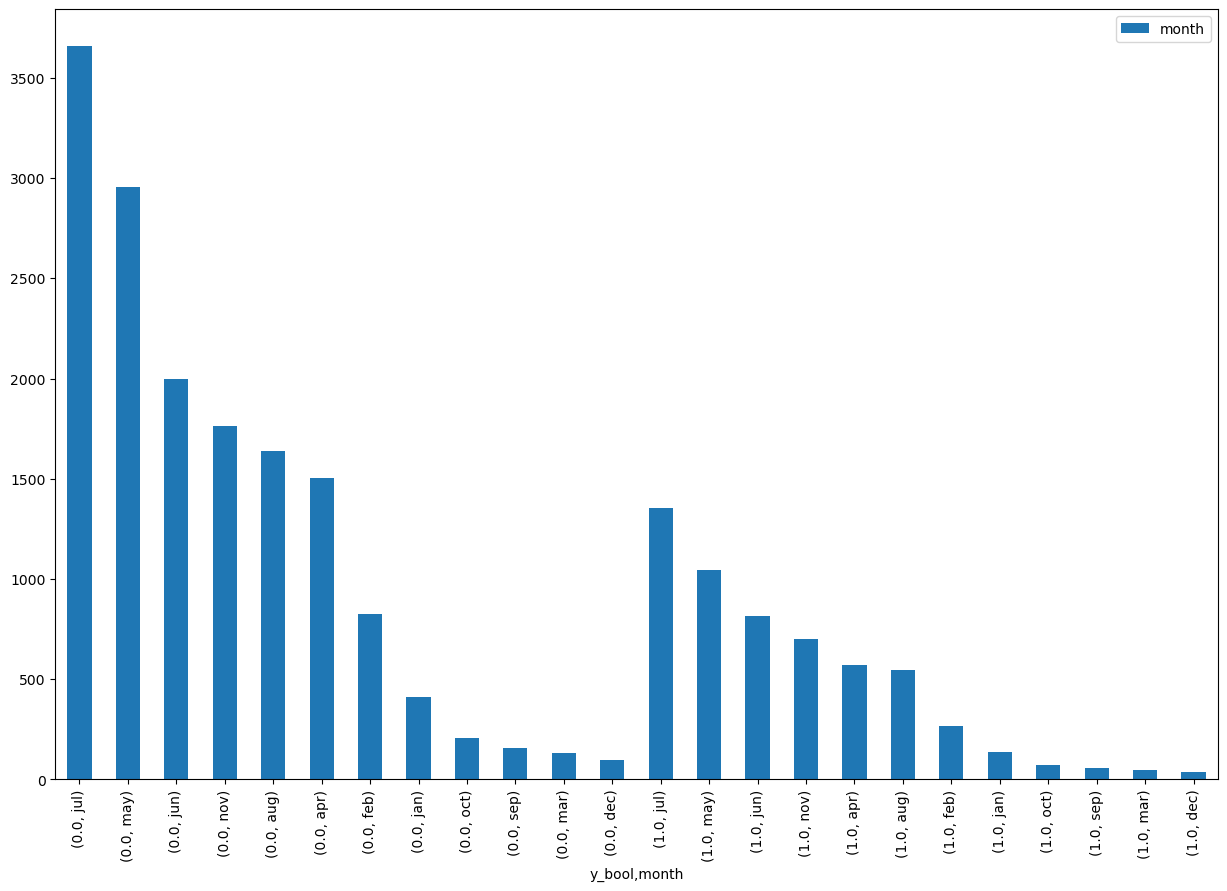

In [53]:
pd.DataFrame(newdata.groupby("y_bool")["month"].value_counts()).plot(kind= 'bar')
plt.show()

In [54]:
def months(x):
    if x in ['oct','nov','dec']:
        return("q4")
    elif x in ["apr", "may", "jun"]:
        return("q2")
    elif x in ['jan', 'feb', 'mar']:
        return("q1")
    else:
        return("q3")

In [55]:
newdata['Month_cat'] = newdata.month.apply(months)

In [56]:
tbl = pd.crosstab(newdata.Month_cat, newdata.y_bool)
teststats, pvalue,df, exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

0.04597093223395938


In [57]:
tbl = pd.crosstab(newdata.month.apply(months), newdata.y_bool)
teststats, pvalue,df, exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

0.04597093223395938


In [58]:
newdata.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession,age_bins,age_cat,balance_bins,Month_cat
0,51,married,tertiary,no,148,no,no,15,apr,4.383333,2,-1,0,unknown,0.0,Employed,1.0,Mature,0.0,q2
1,55,married,secondary,no,7160,yes,no,4,may,5.250000,1,-1,0,unknown,0.0,Blue_colar,2.0,Senior,4.0,q2
2,65,divorced,tertiary,no,2197,yes,no,12,may,1.700000,2,-1,0,unknown,0.0,Blue_colar,2.0,Senior,3.0,q2
3,25,married,secondary,no,6658,yes,no,16,feb,3.283333,1,-1,0,unknown,1.0,Employed,0.0,Adults,4.0,q1
4,36,married,secondary,no,1761,yes,no,19,sep,2.950000,1,-1,0,success,0.0,Blue_colar,1.0,Adults,3.0,q3


In [59]:
newdata.shape

(30000, 20)

In [60]:
# Dropping day and month
newdata.drop(['day','month'], axis =1, inplace = True)

In [61]:
# Split the Data in train and test

newtrain = newdata.loc[0:train.shape[0]-1,:]
newtest = newdata.loc[train.shape[0]:, :]

newtest.drop("y_bool", axis = 1, inplace =True)

In [62]:
# convert target into integer...
newtrain['y_bool'] = newtrain.y_bool.astype(int)

In [63]:
newtrain.shape, newtest.shape, train.shape, test.shape

((21000, 18), (9000, 17), (21000, 17), (9000, 16))

In [64]:
newtrain["age_bins"] = newtrain.age_bins.astype(int)
newtrain["balance_bins"] = newtrain.balance_bins.astype(int)
newtrain["y_bool"] = newtrain.y_bool.astype(int)

In [65]:
newtest["age_bins"] = newtest.age_bins.astype(int)
newtest["balance_bins"] = newtest.balance_bins.astype(int)

In [66]:
newtrain.dtypes

age               int64
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
duration        float64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y_bool            int32
profession       object
age_bins          int32
age_cat          object
balance_bins      int32
Month_cat        object
dtype: object

# Modeling

In [67]:
dummytrain = pd.get_dummies(newtrain, drop_first=True)
dummytest = pd.get_dummies(newtest, drop_first=True)

In [68]:
X = dummytrain.drop("y_bool", axis = 1)
y = dummytrain.y_bool

In [71]:
 X.shape, dummytest.shape

((21000, 27), (9000, 27))

In [86]:
pd.DataFrame(pred).T.mode(axis = 1).value_counts()

0    7313
1    1687
dtype: int64

# SMOTE

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")

smote_x, smote_y = smote.fit_resample(X,y)

# Logistic Regression Model

In [75]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

from sklearn.model_selection import StratifiedGroupKFold
kfold = StratifiedGroupKFold(n_splits=10, shuffle= True, random_state=42)

pred = []
for train_index, test_index in kfold.split(smote_x, smote_y):
    xtrain = smote_x.loc[train_index]
    ytrain = smote_y.loc[train_index]
    pred.append(lg.fit(xtrain,ytrain).predict(dummytest))
    
finalpred = pd.DataFrame(pred).T.mode(axis = 1)[0]

# Submission File

submission = pd.DataFrame({"y_bool": finalpred})
submission.to_csv("LogReg.csv", index= False)

#Public Score:- 12.71554

# Random Forest Classifier Model

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion="entropy")

kfold = StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=42)

pred = []
for train_index, test_index in kfold.split(smote_x, smote_y):
    xtrain = smote_x.loc[train_index]
    ytrain = smote_y.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))
    
finalpred = pd.DataFrame(pred).T.mode(axis = 1)[0]

# Submission File

submission = pd.DataFrame({"y_bool": finalpred})
submission.to_csv("RF.csv", index= False)

# Public Score:- 10.51521

# Gradient Boosting Classifier Model

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()

kfold = StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=42)

pred = []
for train_index, test_index in kfold.split(smote_x, smote_y):
    xtrain = smote_x.loc[train_index]
    ytrain = smote_y.loc[train_index]
    pred.append(gbm.fit(xtrain,ytrain).predict(dummytest))
    
finalpred = pd.DataFrame(pred).T.mode(axis = 1)[0]

# Submission File

submission = pd.DataFrame({"y_bool": finalpred})
submission.to_csv("GBM.csv", index= False)

# Public Score:- 11.52582

In [ ]:
pd.DataFrame(gbm.feature_importances_, index= smote_x.columns, columns = ["Fe"])

# Sequential Feature Selector Model

In [85]:
from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(estimator= GradientBoostingClassifier(),
                               k_features="best", forward= True)

sfs.fit(smote_x, smote_y)

# Decision Tree Regressor Model

In [87]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

kfold = StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=42)

pred = []
for train_index, test_index in kfold.split(smote_x, smote_y):
    xtrain = smote_x.loc[train_index]
    ytrain = smote_y.loc[train_index]
    pred.append(dtree.fit(xtrain,ytrain).predict(dummytest))
    
finalpred = pd.DataFrame(pred).T.mode(axis = 1)[0]

# Submission File

submission = pd.DataFrame({"y_bool": finalpred})
submission.to_csv("Dtree.csv", index= False)

# Public Score:- 13.52148

# Random Forest Classifier Model (Without SMOTE)

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion="entropy")

kfold = StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=42)

pred = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))
    
finalpred = pd.DataFrame(pred).T.mode(axis = 1)[0]

# Submission File

submission = pd.DataFrame({"y_bool": finalpred})
submission.to_csv("RF_WOut_Smote.csv", index= False)

# Public Score:- 8.87775

# Decision Tree Classifier (Without SMOTE)

In [89]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

kfold = StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=42)

pred = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(dtree.fit(xtrain,ytrain).predict(dummytest))
    
finalpred = pd.DataFrame(pred).T.mode(axis = 1)[0]

# Submission File

submission = pd.DataFrame({"y_bool": finalpred})
submission.to_csv("Dtree_WOut_Smote.csv", index= False)

Public Score:- 13.57263

# LGBMClassifier Model

In [91]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

kfold = StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=42)

pred = []
for train_index, test_index in kfold.split(smote_x, smote_y):
    xtrain = smote_x.loc[train_index]
    ytrain = smote_y.loc[train_index]
    pred.append(lgbm.fit(xtrain,ytrain).predict(dummytest))
    
finalpred = pd.DataFrame(pred).T.mode(axis = 1)[0]

# Submission File

submission = pd.DataFrame({"y_bool": finalpred})
submission.to_csv("LGBM.csv", index= False)

* Light GBM needs Parameter tuning
* Tune the RF and GBM model